In [15]:
!pip3 install essentia

In [16]:
!pip3 install madmom

In [17]:
!pip3 install mir_eval

The section below is all path dependent

In [18]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [19]:
import madmom

In [20]:
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [21]:
import mir_eval
from mir_eval import *

In [22]:
statsPath = 'drive/MyDrive/Bass/data/wotm/StudentStatistics_wotm.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [11]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<11:
   sdeviatePath = 'drive/MyDrive/Bass/data/wotm/wotm_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   #multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [12]:
index = df_all.index
number_of_rows = len(index)

In [25]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):

      studentStatisticsArray= []
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df["Sound Quality Mark"].tolist()  
      list4 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          print("===================================")
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])

          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark

          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print(onset_summary)
          print(duration_summary)
          print("  TF 1 Mark  = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          print("F-measure = ", round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          print("===================================")
          studentStatisticsArray.append(studentStatistics)
          k+=1
    
      return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


In [ ]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [ ]:
df_all

In [ ]:
import pandas as pd
#sonset_deviations,soffset_deviations
print(sonset_deviations[0])

In [29]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/wotm/StudentStatistics_wotm.csv') 
header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
X = dataset[['precision','recall','f_measure_value']]#,]]
y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:',  round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  72.000000     77.003
1  79.199997     69.733
2  72.000000     69.079
3  72.000000     65.686
Mean Absolute Error: 5.926
Root Mean Squared Error: 6.385


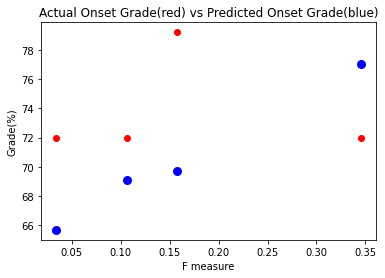

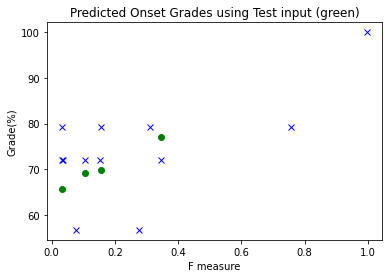

In [32]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_f_measure_value_list = df_all["f_measure_value"].tolist()   
plt.title('Actual Onset Grade(red) vs Predicted Onset Grade(blue)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.scatter(X_test["f_measure_value"].tolist(), y_test,  color='red')
plt.scatter(X_test["f_measure_value"].tolist(), y_pred, color='blue', linewidth=3)
plt.show()

plt.title('Predicted Onset Grades using Test input (green)')
plt.xlabel('F measure')
plt.ylabel('Grade(%)')
plt.plot(onset_f_measure_value_list,onset_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()




In [44]:
X = dataset[['f_measure_value','Duration ABS Mean']]
#X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(round(df,3))
 
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))


      Actual  Predicted
0  72.000000     80.442
1  79.199997     79.164
2  79.199997     75.784
3  72.000000     75.363
Mean Absolute Error: 3.814
Root Mean Squared Error: 4.854


[72.  79.2 79.2 72. ]
[80.4416975  79.16360806 75.78404832 75.36316415]


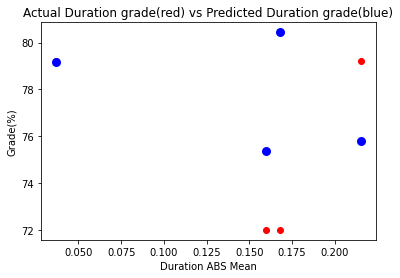

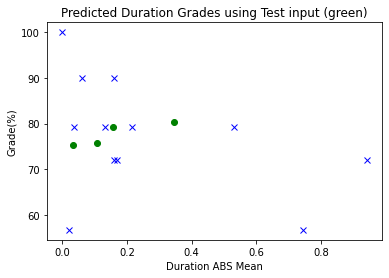

In [46]:

duration_amean_list = df_all["Duration ABS Mean"].tolist()   
duration_grade_list = df_all[" DurationMark"].tolist()   
   
plt.title('Actual Duration grade(red) vs Predicted Duration grade(blue)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_test,  color='red')
plt.scatter(X_test["Duration ABS Mean"].tolist(), y_pred, color='blue', linewidth=3)
print(y_test)
print(y_pred)
plt.show()

plt.title('Predicted Duration Grades using Test input (green)')
plt.xlabel('Duration ABS Mean')
plt.ylabel('Grade(%)')
plt.plot(duration_amean_list,duration_grade_list, 'x',color='blue')
plt.plot(X_test["f_measure_value"].tolist(),y_pred, 'o', color='green')
plt.show()


In [40]:
X = dataset[['f_measure_value']]
y=array(dataset[' TF 1 Mark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) ,'Duration Std',,'Duration Std'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  72.000000  80.704257
1  72.000000  77.569799
2  79.199997  76.719494
3  56.700001  75.519063
Mean Absolute Error: 8.893405247426482
Root Mean Squared Error: 10.806210511739598
